# CLUSTERTING OF THE IRIS DATASET USING KMEANS MODEL

Author : *IGEMHOKHAI SHEDRACH*

In [1]:
# IMPORTING NECCESARY LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Loading data into Dataframe

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Split

In [4]:
x = df.iloc[:, [0, 1, 2, 3]].values

Determining the optimum number of clusters for KMeans model development,using two metrics:

•	Inertia errors

•	Silhouette Score


In [5]:
n_clusters=range(2,11)
inertia_errors=[]
silhouette_scores=[]

for k in n_clusters:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(x)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(x,model.labels_))
    

Visualision of the metrics against Number of Clusters

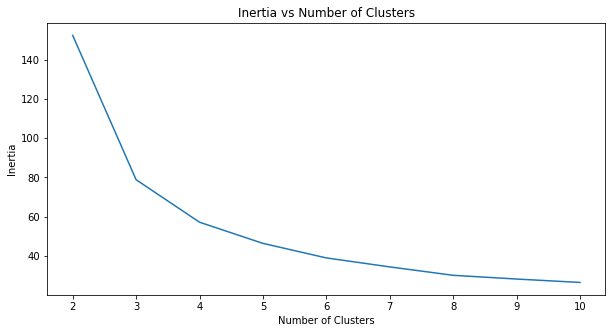

In [6]:
plt.figure(figsize=(10,5))
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs Number of Clusters");

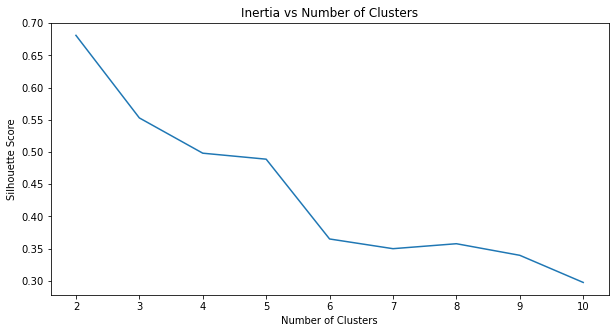

In [7]:
plt.figure(figsize=(10,5))
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Inertia vs Number of Clusters");

The optimum number of clusters for the KMeans model should have the closest inertia error to zero(the perfect score) and a silhouette score closest to 1(Silhouette score ranges from -1 to 1).

From the first visual(Inertia errors against Number of Clusters), the “Elbow” curve starts to flatten at n_clusters=3, hence, the best pick, while the best silhouette score was somewhere between 2 and 3.

Hence, Based on the two visualizations, the optimum number of clusters is 3.


*BUILDING OF FINAL MODEL USING THE OPTINUM NUMBER OF CLUSTERS AS DETERMINED ABOVE*

In [8]:
final_model=KMeans(n_clusters=3,random_state=42)
final_model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [9]:
print("Inertia of Final Model :",final_model.inertia_)
print("Silhouette Score of Final Model :", silhouette_score(x,final_model.labels_))

Inertia of Final Model : 78.851441426146
Silhouette Score of Final Model : 0.5528190123564091


In [10]:
y_kmeans = final_model.fit_predict(x)

In [11]:
centroids=final_model.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

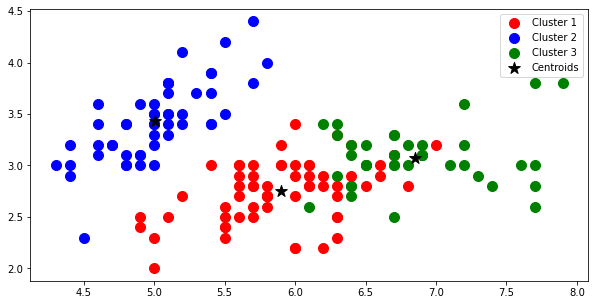

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(centroids[:, 0], centroids[:,1], s = 150, c = 'black',marker="*", label = 'Centroids')
plt.legend()

# DIMENSIONALITY REDUCTION

Since our data is in more than two Dimensions, it is a preferred practise to reduce the dimension of our data to 2 dimensions using Principal component analysis(PCA) for better visualization and performance.

In [13]:
#Library
from sklearn.decomposition import PCA

In [14]:
# Fitting and Transforming...
pca=PCA(n_components=2, random_state=42)
x_t=pca.fit_transform(x)
print("Transformation Complete")

Transformation Complete


In [15]:
# creating a DataFrame of the transformed Data
x_pca=pd.DataFrame(x_t,columns=["PC1","PC2"])
print("x_pca shape :", x_pca.shape)
x_pca.head()

x_pca shape : (150, 2)


,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


we now create a new scatter plot of the clusters using the PCA transformed data

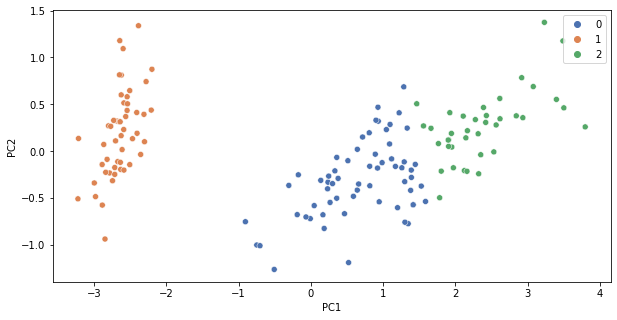

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=x_pca["PC1"],
    y=x_pca["PC2"],
    hue=final_model.labels_,
    palette="deep"
);